In [1]:
folder_path = './final_dataset'

In [2]:
import os
print(os.listdir(folder_path))

['TestData', 'TrainData', 'ValidData']


In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\pragy\appdata\roaming\python\python312\site-packages (2.19.0)




[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install pandas
%pip install numpy
%pip install h5py
%pip install glob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install scikit-learn
import matplotlib.pyplot as plt
import glob 
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#  Test the datset
path_single = r"C:\sem6\minor2\final_dataset\TrainData\img\image_2000.h5"
path_single_mask = r"C:\sem6\minor2\final_dataset\TrainData\mask\mask_2000.h5"

In [8]:
import numpy as np
import pandas as pd


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.42230782933301864..3.9737369685644146].


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


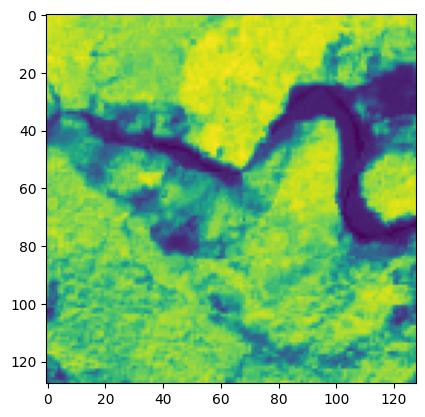

In [9]:
import h5py

f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)

    plt.imshow(data[:, :, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


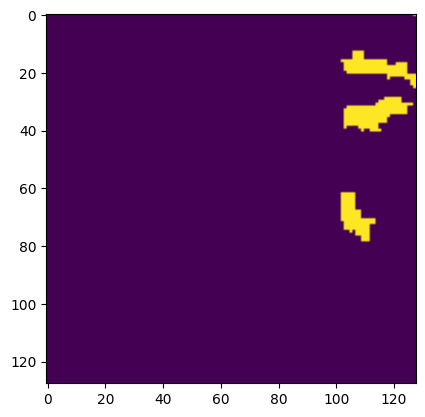

In [62]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [11]:
# @title Using all data
path_single=r"C:\sem6\minor2\final_dataset\TrainData\img\image_10.h5"
path_single_mask=r"C:\sem6\minor2\final_dataset\TrainData\mask\mask_1.h5"
TRAIN_PATH = r"C:/sem6/minor2/final_dataset/TrainData/img/*.h5"
TRAIN_MASK = r'C:/sem6/minor2/final_dataset/TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [12]:
# @title Train with RGB, NDVI, DEM and Slope
#testing for collab gpu
import tensorflow as tf
tf.test.gpu_device_name()

''

In [13]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data


0 C:/sem6/minor2/final_dataset/TrainData/img\image_1.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_1.h5
1 C:/sem6/minor2/final_dataset/TrainData/img\image_10.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_10.h5
2 C:/sem6/minor2/final_dataset/TrainData/img\image_100.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_100.h5
3 C:/sem6/minor2/final_dataset/TrainData/img\image_1000.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_1000.h5
4 C:/sem6/minor2/final_dataset/TrainData/img\image_1001.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_1001.h5
5 C:/sem6/minor2/final_dataset/TrainData/img\image_1002.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_1002.h5
6 C:/sem6/minor2/final_dataset/TrainData/img\image_1003.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_1003.h5
7 C:/sem6/minor2/final_dataset/TrainData/img\image_1004.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_1004.h5
8 C:/sem6/minor2/final_dataset/TrainData/img\image_1005.h5 C:/sem6/minor2/final_data

C:\Users\pragy\AppData\Local\Temp\ipykernel_9432\3166450149.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1689 C:/sem6/minor2/final_dataset/TrainData/img\image_2519.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2519.h5
1690 C:/sem6/minor2/final_dataset/TrainData/img\image_252.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_252.h5
1691 C:/sem6/minor2/final_dataset/TrainData/img\image_2520.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2520.h5
1692 C:/sem6/minor2/final_dataset/TrainData/img\image_2521.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2521.h5
1693 C:/sem6/minor2/final_dataset/TrainData/img\image_2522.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2522.h5
1694 C:/sem6/minor2/final_dataset/TrainData/img\image_2523.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2523.h5
1695 C:/sem6/minor2/final_dataset/TrainData/img\image_2524.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2524.h5
1696 C:/sem6/minor2/final_dataset/TrainData/img\image_2525.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_2525.h5
1697 C:/sem6/minor2/final_dataset/TrainData/img\im

C:\Users\pragy\AppData\Local\Temp\ipykernel_9432\3166450149.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2264 C:/sem6/minor2/final_dataset/TrainData/img\image_3036.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3036.h5
2265 C:/sem6/minor2/final_dataset/TrainData/img\image_3037.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3037.h5
2266 C:/sem6/minor2/final_dataset/TrainData/img\image_3038.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3038.h5
2267 C:/sem6/minor2/final_dataset/TrainData/img\image_3039.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3039.h5
2268 C:/sem6/minor2/final_dataset/TrainData/img\image_304.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_304.h5
2269 C:/sem6/minor2/final_dataset/TrainData/img\image_3040.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3040.h5
2270 C:/sem6/minor2/final_dataset/TrainData/img\image_3041.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3041.h5
2271 C:/sem6/minor2/final_dataset/TrainData/img\image_3042.h5 C:/sem6/minor2/final_dataset/TrainData/mask\mask_3042.h5
2272 C:/sem6/minor2/final_dataset/TrainData/img\im

In [14]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [15]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7836734693877552].


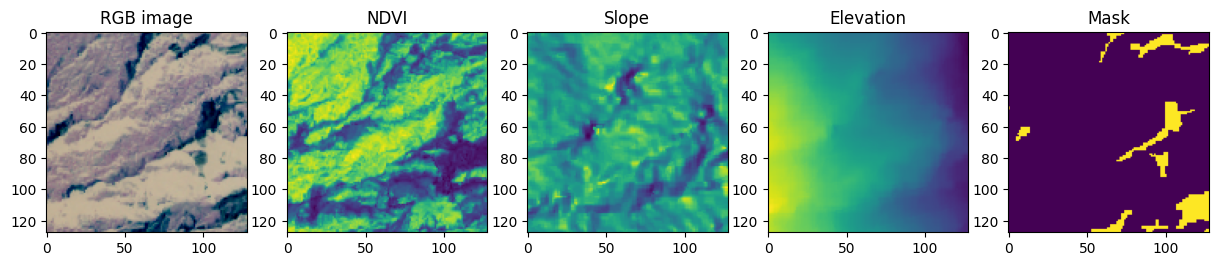

In [16]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [17]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.728448275862069].


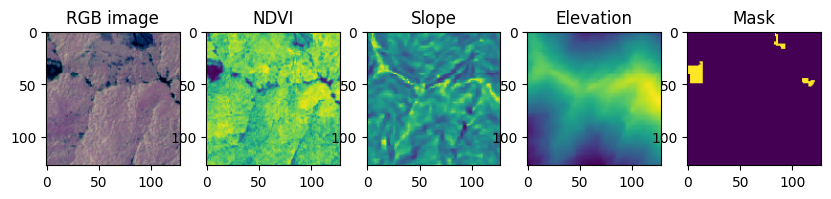

In [18]:
# Visualization of training data
img=1545
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(10,10))

ax1.set_title('RGB image')
ax2.set_title('NDVI')
ax3.set_title('Slope')
ax4.set_title('Elevation')
ax5.set_title('Mask')
ax1.imshow(TRAIN_XX[img,:,:,0:3])
ax2.imshow(TRAIN_XX[img,:,:,3]) # corrected this line, TRAIN_XX instead of TRAIN_YY
ax3.imshow(TRAIN_XX[img,:,:,4])
ax4.imshow(TRAIN_XX[img,:,:,5])
ax5.imshow(TRAIN_YY[img,:,:,0]) # corrected this line, index should be 0.

In [19]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [20]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7662479519388312].


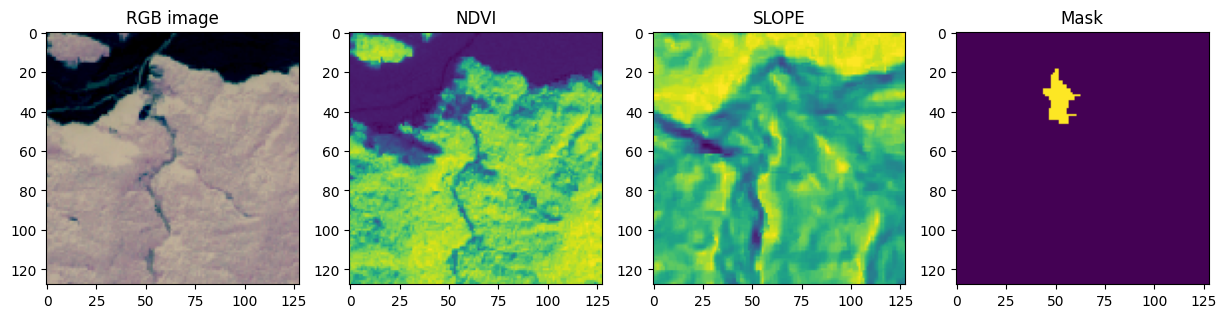

In [21]:
img=2000
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [22]:
import shutil
shutil.copy('C:/sem6/minor2/utils.py', 'C:/sem6/utils.py')

'C:/sem6/utils.py'

In [23]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
print(x_train.shape)
print(x_valid.shape)

(3039, 128, 128, 6)
(760, 128, 128, 6)


In [25]:
import tensorflow as tf
from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [26]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=20, verbose=1, mode='max')

callbacks = [
    earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,
          epochs=30,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)
#model.save('/content/drive/MyDrive/best_model.h5')

model.save("model_save.h5")

Epoch 1/30


C:\Users\pragy\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 6))
  warnings.warn(msg)



Epoch 1: val_f1_m improved from -inf to 0.55679, saving model to best_model.h5


190/190 - 191s - 1s/step - accuracy: 0.9770 - f1_m: 0.2598 - loss: 0.0713 - precision_m: 0.4975 - recall_m: 0.2140 - val_accuracy: 0.9820 - val_f1_m: 0.5568 - val_loss: 0.0474 - val_precision_m: 0.6240 - val_recall_m: 0.5265
Epoch 2/30

Epoch 2: val_f1_m improved from 0.55679 to 0.59574, saving model to best_model.h5


190/190 - 138s - 728ms/step - accuracy: 0.9840 - f1_m: 0.5862 - loss: 0.0429 - precision_m: 0.7049 - recall_m: 0.5254 - val_accuracy: 0.9837 - val_f1_m: 0.5957 - val_loss: 0.0439 - val_precision_m: 0.6440 - val_recall_m: 0.5701
Epoch 3/30

Epoch 3: val_f1_m improved from 0.59574 to 0.60031, saving model to best_model.h5


190/190 - 185s - 976ms/step - accuracy: 0.9852 - f1_m: 0.6148 - loss: 0.0388 - precision_m: 0.7471 - recall_m: 0.5410 - val_accuracy: 0.9849 - val_f1_m: 0.6003 - val_loss: 0.0393 - val_precision_m: 0.7107 - val_recall_m: 0.5353
Epoch 4/30

Epoch 4: val_f1_m improved from 0.60031 to 0.63423, saving model to best_model.h5


190/190 - 203s - 1s/step - accuracy: 0.9858 - f1_m: 0.6264 - loss: 0.0367 - precision_m: 0.7552 - recall_m: 0.5512 - val_accuracy: 0.9866 - val_f1_m: 0.6342 - val_loss: 0.0358 - val_precision_m: 0.7645 - val_recall_m: 0.5502
Epoch 5/30

Epoch 5: val_f1_m improved from 0.63423 to 0.64291, saving model to best_model.h5


190/190 - 166s - 872ms/step - accuracy: 0.9863 - f1_m: 0.6394 - loss: 0.0352 - precision_m: 0.7674 - recall_m: 0.5619 - val_accuracy: 0.9866 - val_f1_m: 0.6429 - val_loss: 0.0350 - val_precision_m: 0.7556 - val_recall_m: 0.5671
Epoch 6/30

Epoch 6: val_f1_m did not improve from 0.64291
190/190 - 138s - 727ms/step - accuracy: 0.9865 - f1_m: 0.6468 - loss: 0.0347 - precision_m: 0.7735 - recall_m: 0.5696 - val_accuracy: 0.9863 - val_f1_m: 0.6313 - val_loss: 0.0369 - val_precision_m: 0.7461 - val_recall_m: 0.5552
Epoch 7/30

Epoch 7: val_f1_m improved from 0.64291 to 0.67279, saving model to best_model.h5


190/190 - 188s - 990ms/step - accuracy: 0.9867 - f1_m: 0.6501 - loss: 0.0341 - precision_m: 0.7742 - recall_m: 0.5741 - val_accuracy: 0.9866 - val_f1_m: 0.6728 - val_loss: 0.0343 - val_precision_m: 0.6969 - val_recall_m: 0.6592
Epoch 8/30

Epoch 8: val_f1_m did not improve from 0.67279
190/190 - 148s - 781ms/step - accuracy: 0.9866 - f1_m: 0.6507 - loss: 0.0342 - precision_m: 0.7774 - recall_m: 0.5754 - val_accuracy: 0.9866 - val_f1_m: 0.6495 - val_loss: 0.0349 - val_precision_m: 0.7401 - val_recall_m: 0.5854
Epoch 9/30

Epoch 9: val_f1_m did not improve from 0.67279
190/190 - 174s - 918ms/step - accuracy: 0.9871 - f1_m: 0.6669 - loss: 0.0329 - precision_m: 0.7778 - recall_m: 0.5956 - val_accuracy: 0.9858 - val_f1_m: 0.6682 - val_loss: 0.0356 - val_precision_m: 0.6607 - val_recall_m: 0.6871
Epoch 10/30

Epoch 10: val_f1_m did not improve from 0.67279
190/190 - 173s - 911ms/step - accuracy: 0.9867 - f1_m: 0.6559 - loss: 0.0337 - precision_m: 0.7827 - recall_m: 0.5816 - val_accuracy: 0.9

190/190 - 154s - 809ms/step - accuracy: 0.9878 - f1_m: 0.6899 - loss: 0.0306 - precision_m: 0.7917 - recall_m: 0.6209 - val_accuracy: 0.9870 - val_f1_m: 0.6757 - val_loss: 0.0327 - val_precision_m: 0.7292 - val_recall_m: 0.6395
Epoch 18/30

Epoch 18: val_f1_m improved from 0.67566 to 0.68541, saving model to best_model.h5


190/190 - 176s - 924ms/step - accuracy: 0.9879 - f1_m: 0.6808 - loss: 0.0308 - precision_m: 0.7846 - recall_m: 0.6144 - val_accuracy: 0.9880 - val_f1_m: 0.6854 - val_loss: 0.0306 - val_precision_m: 0.7644 - val_recall_m: 0.6277
Epoch 19/30

Epoch 19: val_f1_m did not improve from 0.68541
190/190 - 149s - 787ms/step - accuracy: 0.9879 - f1_m: 0.6923 - loss: 0.0303 - precision_m: 0.7917 - recall_m: 0.6259 - val_accuracy: 0.9880 - val_f1_m: 0.6812 - val_loss: 0.0307 - val_precision_m: 0.7746 - val_recall_m: 0.6155
Epoch 20/30

Epoch 20: val_f1_m did not improve from 0.68541
190/190 - 157s - 824ms/step - accuracy: 0.9880 - f1_m: 0.6914 - loss: 0.0303 - precision_m: 0.7902 - recall_m: 0.6237 - val_accuracy: 0.9876 - val_f1_m: 0.6637 - val_loss: 0.0331 - val_precision_m: 0.7932 - val_recall_m: 0.5767
Epoch 21/30

Epoch 21: val_f1_m improved from 0.68541 to 0.69113, saving model to best_model.h5


190/190 - 205s - 1s/step - accuracy: 0.9881 - f1_m: 0.6974 - loss: 0.0299 - precision_m: 0.7910 - recall_m: 0.6337 - val_accuracy: 0.9881 - val_f1_m: 0.6911 - val_loss: 0.0304 - val_precision_m: 0.7574 - val_recall_m: 0.6434
Epoch 22/30

Epoch 22: val_f1_m did not improve from 0.69113
190/190 - 118s - 619ms/step - accuracy: 0.9881 - f1_m: 0.6924 - loss: 0.0300 - precision_m: 0.7869 - recall_m: 0.6295 - val_accuracy: 0.9861 - val_f1_m: 0.6542 - val_loss: 0.0357 - val_precision_m: 0.6989 - val_recall_m: 0.6288
Epoch 23/30

Epoch 23: val_f1_m did not improve from 0.69113
190/190 - 113s - 593ms/step - accuracy: 0.9877 - f1_m: 0.6845 - loss: 0.0312 - precision_m: 0.7799 - recall_m: 0.6212 - val_accuracy: 0.9880 - val_f1_m: 0.6841 - val_loss: 0.0307 - val_precision_m: 0.7735 - val_recall_m: 0.6204
Epoch 24/30

Epoch 24: val_f1_m did not improve from 0.69113
190/190 - 111s - 585ms/step - accuracy: 0.9884 - f1_m: 0.7021 - loss: 0.0290 - precision_m: 0.7907 - recall_m: 0.6403 - val_accuracy: 0.

190/190 - 164s - 863ms/step - accuracy: 0.9887 - f1_m: 0.7090 - loss: 0.0283 - precision_m: 0.7967 - recall_m: 0.6456 - val_accuracy: 0.9882 - val_f1_m: 0.6973 - val_loss: 0.0300 - val_precision_m: 0.7616 - val_recall_m: 0.6483
Epoch 27/30

Epoch 27: val_f1_m did not improve from 0.69733
190/190 - 137s - 723ms/step - accuracy: 0.9888 - f1_m: 0.7147 - loss: 0.0281 - precision_m: 0.7992 - recall_m: 0.6539 - val_accuracy: 0.9881 - val_f1_m: 0.6944 - val_loss: 0.0306 - val_precision_m: 0.7536 - val_recall_m: 0.6498
Epoch 28/30

Epoch 28: val_f1_m did not improve from 0.69733
190/190 - 170s - 896ms/step - accuracy: 0.9884 - f1_m: 0.7114 - loss: 0.0293 - precision_m: 0.7970 - recall_m: 0.6513 - val_accuracy: 0.9878 - val_f1_m: 0.6643 - val_loss: 0.0319 - val_precision_m: 0.8041 - val_recall_m: 0.5733
Epoch 29/30

Epoch 29: val_f1_m did not improve from 0.69733
190/190 - 119s - 627ms/step - accuracy: 0.9888 - f1_m: 0.7139 - loss: 0.0280 - precision_m: 0.7969 - recall_m: 0.6544 - val_accuracy:

In [27]:
model.save('/sem6/minor2/best_model.h5')

In [28]:
import os
print(os.getcwd())
print(os.listdir())

c:\sem6\minor2
['best_model.h5', 'desktop.ini', 'docs', 'final_dataset', 'landslide (2).ipynb', 'model_save.h5', 'utils.py', '__pycache__']


In [29]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.031893543899059296 0.987982988357544 0.7000699043273926 0.7854549288749695 0.63792484998703


In [30]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)

print(f"Loss: {loss:.2%}")
print(f"Accuracy: {accuracy:.2%}")
print(f"F1 Score: {f1_score:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")

Loss: 3.19%
Accuracy: 98.80%
F1 Score: 70.01%
Precision: 78.55%
Recall: 63.79%


Prediction below

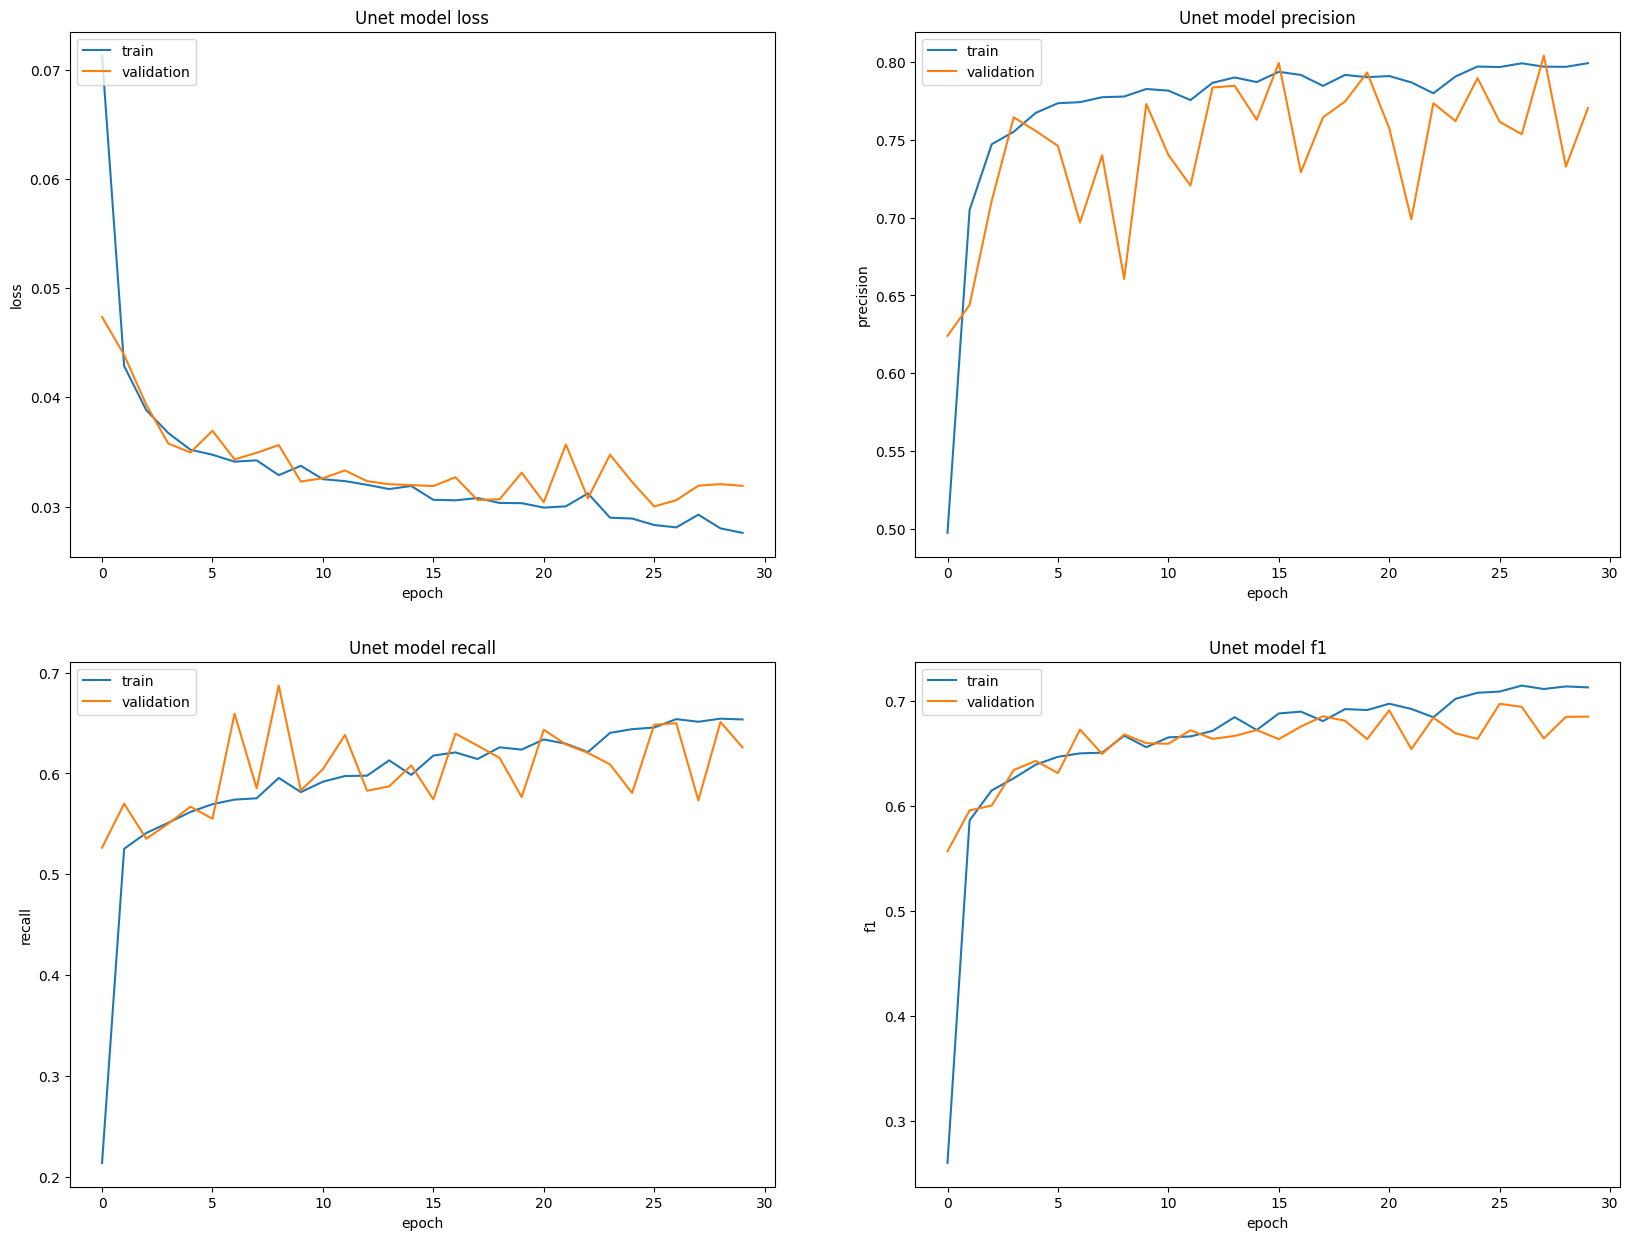

In [31]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [32]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

C:\Users\pragy\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 6))
  warnings.warn(msg)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step


Text(0.5, 1.0, 'Training Image')

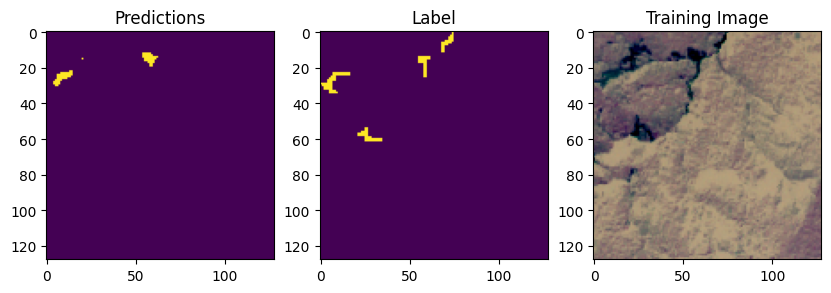

In [33]:
img = 185
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(10,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [41]:
validation_url = r'C:\sem6\minor2\final_dataset\ValidData\img\*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\sem6\minor2\final_dataset\ValidData\img\image_1.h5
1 C:\sem6\minor2\final_dataset\ValidData\img\image_10.h5
2 C:\sem6\minor2\final_dataset\ValidData\img\image_100.h5
3 C:\sem6\minor2\final_dataset\ValidData\img\image_101.h5
4 C:\sem6\minor2\final_dataset\ValidData\img\image_102.h5
5 C:\sem6\minor2\final_dataset\ValidData\img\image_103.h5
6 C:\sem6\minor2\final_dataset\ValidData\img\image_104.h5
7 C:\sem6\minor2\final_dataset\ValidData\img\image_105.h5
8 C:\sem6\minor2\final_dataset\ValidData\img\image_106.h5
9 C:\sem6\minor2\final_dataset\ValidData\img\image_107.h5
10 C:\sem6\minor2\final_dataset\ValidData\img\image_108.h5
11 C:\sem6\minor2\final_dataset\ValidData\img\image_109.h5
12 C:\sem6\minor2\final_dataset\ValidData\img\image_11.h5
13 C:\sem6\minor2\final_dataset\ValidData\img\image_110.h5
14 C:\sem6\minor2\final_dataset\ValidData\img\image_111.h5
15 C:\sem6\minor2\final_dataset\ValidData\img\image_112.h5
16 C:\sem6\minor2\final_dataset\ValidData\img\image_113.h5
17 C:\sem6\

C:\Users\pragy\AppData\Local\Temp\ipykernel_9432\4217963898.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


160 C:\sem6\minor2\final_dataset\ValidData\img\image_243.h5
161 C:\sem6\minor2\final_dataset\ValidData\img\image_244.h5
162 C:\sem6\minor2\final_dataset\ValidData\img\image_245.h5
163 C:\sem6\minor2\final_dataset\ValidData\img\image_25.h5
164 C:\sem6\minor2\final_dataset\ValidData\img\image_26.h5
165 C:\sem6\minor2\final_dataset\ValidData\img\image_27.h5
166 C:\sem6\minor2\final_dataset\ValidData\img\image_28.h5
167 C:\sem6\minor2\final_dataset\ValidData\img\image_29.h5
168 C:\sem6\minor2\final_dataset\ValidData\img\image_3.h5
169 C:\sem6\minor2\final_dataset\ValidData\img\image_30.h5
170 C:\sem6\minor2\final_dataset\ValidData\img\image_31.h5
171 C:\sem6\minor2\final_dataset\ValidData\img\image_32.h5
172 C:\sem6\minor2\final_dataset\ValidData\img\image_33.h5
173 C:\sem6\minor2\final_dataset\ValidData\img\image_34.h5
174 C:\sem6\minor2\final_dataset\ValidData\img\image_35.h5
175 C:\sem6\minor2\final_dataset\ValidData\img\image_36.h5
176 C:\sem6\minor2\final_dataset\ValidData\img\image_3

In [42]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

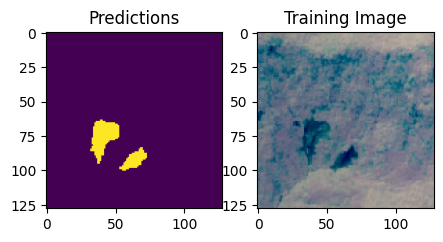

In [43]:
img = 222
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(5,5))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [45]:
import os

write_directory = r'/sem6/minor2/final_dataset/ValidData/mask'
os.makedirs(write_directory, exist_ok=True)

for i, name in enumerate(mask_name):
    filename_only = os.path.basename(name)  # << this removes full path
    h5f = h5py.File(os.path.join(write_directory, filename_only), 'w')
    
    pred_mask = pred_img[i, :, :, 0]
    h5f.create_dataset('mask', data=pred_mask)
    h5f.close()


In [49]:
test_url = r'C:\sem6\minor2\final_dataset\TestData\img\*.h5'
img_val = sorted(glob.glob(test_url))

VAL_XX = np.zeros((800, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\sem6\minor2\final_dataset\TestData\img\image_1.h5
1 C:\sem6\minor2\final_dataset\TestData\img\image_10.h5
2 C:\sem6\minor2\final_dataset\TestData\img\image_100.h5
3 C:\sem6\minor2\final_dataset\TestData\img\image_101.h5
4 C:\sem6\minor2\final_dataset\TestData\img\image_102.h5
5 C:\sem6\minor2\final_dataset\TestData\img\image_103.h5
6 C:\sem6\minor2\final_dataset\TestData\img\image_104.h5
7 C:\sem6\minor2\final_dataset\TestData\img\image_105.h5
8 C:\sem6\minor2\final_dataset\TestData\img\image_106.h5
9 C:\sem6\minor2\final_dataset\TestData\img\image_107.h5
10 C:\sem6\minor2\final_dataset\TestData\img\image_108.h5
11 C:\sem6\minor2\final_dataset\TestData\img\image_109.h5
12 C:\sem6\minor2\final_dataset\TestData\img\image_11.h5
13 C:\sem6\minor2\final_dataset\TestData\img\image_110.h5
14 C:\sem6\minor2\final_dataset\TestData\img\image_111.h5
15 C:\sem6\minor2\final_dataset\TestData\img\image_112.h5
16 C:\sem6\minor2\final_dataset\TestData\img\image_113.h5
17 C:\sem6\minor2\final_data

C:\Users\pragy\AppData\Local\Temp\ipykernel_9432\3388022865.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


756 C:\sem6\minor2\final_dataset\TestData\img\image_780.h5
757 C:\sem6\minor2\final_dataset\TestData\img\image_781.h5
758 C:\sem6\minor2\final_dataset\TestData\img\image_782.h5
759 C:\sem6\minor2\final_dataset\TestData\img\image_783.h5
760 C:\sem6\minor2\final_dataset\TestData\img\image_784.h5
761 C:\sem6\minor2\final_dataset\TestData\img\image_785.h5
762 C:\sem6\minor2\final_dataset\TestData\img\image_786.h5
763 C:\sem6\minor2\final_dataset\TestData\img\image_787.h5
764 C:\sem6\minor2\final_dataset\TestData\img\image_788.h5
765 C:\sem6\minor2\final_dataset\TestData\img\image_789.h5
766 C:\sem6\minor2\final_dataset\TestData\img\image_79.h5
767 C:\sem6\minor2\final_dataset\TestData\img\image_790.h5
768 C:\sem6\minor2\final_dataset\TestData\img\image_791.h5
769 C:\sem6\minor2\final_dataset\TestData\img\image_792.h5
770 C:\sem6\minor2\final_dataset\TestData\img\image_793.h5
771 C:\sem6\minor2\final_dataset\TestData\img\image_794.h5
772 C:\sem6\minor2\final_dataset\TestData\img\image_795.h

In [50]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step


(800, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

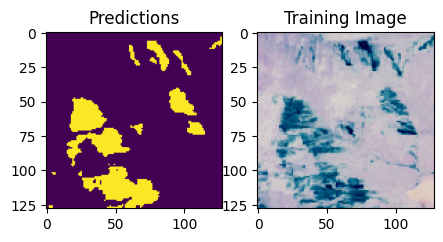

In [51]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(5,5))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [52]:
import os
import h5py

write_directory = r'/sem6/minor2/final_dataset/TestData/mask'
os.makedirs(write_directory, exist_ok=True)

for i, name in enumerate(mask_name):
    filename_only = os.path.basename(name)
    full_path = os.path.join(write_directory, filename_only)
    with h5py.File(full_path, 'w') as h5f:
        pred_mask = pred_img[i, :, :, 0]
        h5f.create_dataset('mask', data=pred_mask)

In [55]:
import h5py

file_path = "/sem6/minor2/best_model.h5"  # file path

with h5py.File(file_path, "r") as hdf:
    print("Keys in the file:", list(hdf.keys()))  # Lists all datasets


Keys in the file: ['model_weights', 'optimizer_weights']


In [56]:
from tensorflow.keras.models import load_model

file_path = "/sem6/minor2/best_model.h5"  # Change this to your file path
best_model = load_model(file_path, custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
best_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        880 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 128) │          0 │ conv2d_7[0][0]  

 Total params: 1,941,539 (7.41 MB)

 Trainable params: 1,941,537 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [57]:
print("Input Shape:", best_model.input_shape)
print("Output Shape:", best_model.output_shape)

Input Shape: (None, 128, 128, 6)
Output Shape: (None, 128, 128, 1)


In [58]:
print("Loss Function:", best_model.loss)
print("Metrics:", best_model.metrics_names)
print("Optimizer:", best_model.optimizer)

Loss Function: <function binary_crossentropy at 0x000001A3B449D120>
Metrics: ['loss', 'compile_metrics']
Optimizer: <keras.src.optimizers.adam.Adam object at 0x000001A396E2ABA0>


In [59]:
print("Metrics:", [m.name for m in best_model.metrics])

Metrics: ['loss', 'compile_metrics']


classification below

In [71]:
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt

# Define paths
TRAIN_PATH = r"C:/sem6/minor2/final_dataset/TrainData/img/*.h5"
TRAIN_MASK = r"C:/sem6/minor2/final_dataset/TrainData/mask/*.h5"

# Initialize arrays
TRAIN_XX = np.zeros((3799, 128, 128, 6))  # 6 features: R, G, B, NDVI, Slope, Elevation
TRAIN_YY = np.zeros((3799, 128, 128, 1))  # Masks

# Read all files
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

# Define a small epsilon to avoid division by zero
epsilon = 1e-6

# Feature extraction loop
for i, (img_path, mask_path) in enumerate(zip(all_train, all_mask)):
    print(f"Processing {i}: {img_path}, {mask_path}")
    
    # Read image
    with h5py.File(img_path, 'r') as hdf:
        data = np.array(hdf.get('img'))
        data[np.isnan(data)] = 0.000001  # Handle NaNs inside original image

        # Normalize RGB channels
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0
        
        # Extract bands
        data_red = data[:, :, 3]
        data_green = data[:, :, 2]
        data_blue = data[:, :, 1]
        data_nir = data[:, :, 7]

        # Compute NDVI safely
        data_ndvi = np.divide((data_nir - data_red), (data_nir + data_red + epsilon))
        
        # Fill TRAIN_XX
        TRAIN_XX[i, :, :, 0] = 1 - data_red / (mid_rgb + epsilon)      # RED normalized
        TRAIN_XX[i, :, :, 1] = 1 - data_green / (mid_rgb + epsilon)     # GREEN normalized
        TRAIN_XX[i, :, :, 2] = 1 - data_blue / (mid_rgb + epsilon)      # BLUE normalized
        TRAIN_XX[i, :, :, 3] = data_ndvi                               # NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / (mid_slope + epsilon)  # Slope normalized
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / (mid_elevation + epsilon) # Elevation normalized

    # Read mask
    with h5py.File(mask_path, 'r') as hdf:
        data_mask = np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data_mask

# After loop: Replace any NaNs in TRAIN_XX (safety net)
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001

# Print stats to verify
print("Feature data shape:", TRAIN_XX.shape)
print("Mask data shape:", TRAIN_YY.shape)
print("TRAIN_XX min/max:", TRAIN_XX.min(), "/", TRAIN_XX.max())
print("TRAIN_YY min/max:", TRAIN_YY.min(), "/", TRAIN_YY.max())

Processing 0: C:/sem6/minor2/final_dataset/TrainData/img\image_1.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_1.h5
Processing 1: C:/sem6/minor2/final_dataset/TrainData/img\image_10.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_10.h5
Processing 2: C:/sem6/minor2/final_dataset/TrainData/img\image_100.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_100.h5
Processing 3: C:/sem6/minor2/final_dataset/TrainData/img\image_1000.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_1000.h5
Processing 4: C:/sem6/minor2/final_dataset/TrainData/img\image_1001.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_1001.h5
Processing 5: C:/sem6/minor2/final_dataset/TrainData/img\image_1002.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_1002.h5
Processing 6: C:/sem6/minor2/final_dataset/TrainData/img\image_1003.h5, C:/sem6/minor2/final_dataset/TrainData/mask\mask_1003.h5
Processing 7: C:/sem6/minor2/final_dataset/TrainData/img\image_1004.h5, C:/sem6/minor2/final_dataset/TrainDat

try 1

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 2: Create Image-Level Labels

# Compute positive pixel fraction per image
positive_pixel_fraction = np.mean(TRAIN_YY, axis=(1, 2, 3))  # shape (3799,)

# Thresholding: if more than 5% pixels are positive => landslide-prone
threshold = 0.05
image_labels = (positive_pixel_fraction > threshold).astype(np.uint8)

print("Image-level labels shape:", image_labels.shape)
print("Class distribution:", np.bincount(image_labels))



Image-level labels shape: (3799,)
Class distribution: [3219  580]


In [ ]:
# Step 3: Prepare Data

# Aggregate features: mean pooling across spatial dimensions
X_features = np.mean(TRAIN_XX, axis=(1, 2))  # shape (3799, 6)
y_labels = image_labels  # shape (3799,)

print("X_features shape:", X_features.shape)
print("y_labels shape:", y_labels.shape)

# Train-validation split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels)




X_features shape: (3799, 6)
y_labels shape: (3799,)


In [ ]:

# Step 4: Build Classification Model


model = Sequential([
    Input(shape=(6,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 output for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train the Model

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

# Now train the model with class weights
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    verbose=1)


# Step 6: Evaluate the Model

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(np.uint8)

acc = accuracy_score(y_test, y_pred) * 100
prec = precision_score(y_test, y_pred) * 100
rec = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"\nMetrics:")
print(f"Accuracy:  {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall:    {rec:.2f}%")
print(f"F1 Score:  {f1:.2f}%")

Class weights: {0: np.float64(0.5900970873786408), 1: np.float64(3.2747844827586206)}
Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4200 - val_accuracy: 0.8000 - val_loss: 0.3814
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.3760 - val_accuracy: 0.8039 - val_loss: 0.3729
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.3862 - val_accuracy: 0.7895 - val_loss: 0.4082
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8066 - loss: 0.3620 - val_accuracy: 0.7987 - val_loss: 0.3728
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.3641 - val_accuracy: 0.7684 - val_loss: 0.4463
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.3609 - val_accuracy: 0.7829 - val_loss: 0.4165
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8161 - loss: 0.3400 - val_accuracy: 0.7908 - val_loss: 0.3972
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━

In [ ]:
try 2 using cnn

In [78]:

from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight

# Assuming TRAIN_XX and your labels (y_labels) are ready
# TRAIN_XX shape: (3799, 128, 128, 6)
# y_labels shape: (3799,)

# 1. Data Preparation
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001  # NaN handling if needed

X_train, X_test, y_train, y_test = train_test_split(
    TRAIN_XX, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

# 2. Class Weights (important for imbalance)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

# 3. CNN Model
model = models.Sequential([
    layers.Input(shape=(128, 128, 6)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# 4. Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    class_weight=class_weight_dict,
    verbose=1
)

# 5. Evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred) * 100
prec = precision_score(y_test, y_pred) * 100
rec = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy:  {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall:    {rec:.2f}%")
print(f"F1 Score:  {f1:.2f}%")


Class Weights: {0: np.float64(0.5900970873786408), 1: np.float64(3.2747844827586206)}


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,673 (16.36 MB)

 Trainable params: 4,288,673 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 299ms/step - accuracy: 0.6576 - loss: 0.6310 - val_accuracy: 0.7566 - val_loss: 0.5141
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.8269 - loss: 0.3593 - val_accuracy: 0.8434 - val_loss: 0.3142
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step - accuracy: 0.8461 - loss: 0.2948 - val_accuracy: 0.8855 - val_loss: 0.2487
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 26s 276ms/step - accuracy: 0.8667 - loss: 0.2738 - val_accuracy: 0.8763 - val_loss: 0.2459
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 28s 289ms/step - accuracy: 0.8912 - loss: 0.2368 - val_accuracy: 0.8263 - val_loss: 0.3872
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 26s 274ms/step - accuracy: 0.8830 - loss: 0.2344 - val_accuracy: 0.7763 - val_loss: 0.4707
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - accuracy: 0.8849 - loss: 0.2177 - val_accuracy: 0.8224 - val_loss: 0.3543
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step - accuracy: 0.9055 - loss: 0.1747 - val_accu

In [79]:
model.save("landslide_classifier.h5")

In [86]:
import tkinter as tk
from tkinter import filedialog

# Load the model once (assuming you have already trained it)
model = load_model("landslide_classifier.h5")

# Preprocessing function (same as before)
def preprocess_uploaded_image(image_file):
    f_data = np.zeros((1, 128, 128, 6))

    with h5py.File(image_file, 'r') as hdf:
        data = np.array(hdf.get('img'))
        data[np.isnan(data)] = 0.000001  # Fix NaN values

        # Normalize and compute features (e.g., NDVI, Slope, Elevation)
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))

        f_data[0, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # Red channel
        f_data[0, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # Green channel
        f_data[0, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # Blue channel
        f_data[0, :, :, 3] = data_ndvi  # NDVI
        f_data[0, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # Slope
        f_data[0, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # Elevation

    return f_data

# Inference function: Classify the uploaded image
def classify_landslide(image_file):
    # Preprocess the image
    input_data = preprocess_uploaded_image(image_file)
    
    # Model prediction
    pred = model.predict(input_data)
    pred_class = (pred > 0.5).astype("int32")
    
    # Display the result based on prediction
    if pred_class[0][0] == 1:
        return "Landslide-prone area detected!"
    else:
        return "Safe (Not landslide-prone)"

# Load file and classify
def load_file():
    # Open file dialog to select a file
    file_path = filedialog.askopenfilename(title="Select a file", filetypes=(("HDF5 files", "*.h5"), ("All files", "*.*")))
    
    if file_path:
        print(f"File selected: {file_path}")
        result = classify_landslide(file_path)
        print(result)

# Create the main window
root = tk.Tk()
root.title("Landslide Classifier")

# Create an Upload button
upload_button = tk.Button(root, text="Upload File", command=load_file)
upload_button.pack(pady=20)

# Run the Tkinter main loop
root.mainloop()


File selected: C:/sem6/minor2/final_dataset/TestData/img/image_323.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Safe (Not landslide-prone)
File selected: C:/sem6/minor2/final_dataset/TestData/img/image_24.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Landslide-prone area detected!
